In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [2]:
#Read the data set
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [3]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [4]:
data.shape

(400, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [9]:
data.tail(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [10]:
data.sample(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
147,10.51,140,54,9,402,119,Good,41,16,No,Yes


In [11]:
import warnings
warnings.filterwarnings("ignore")

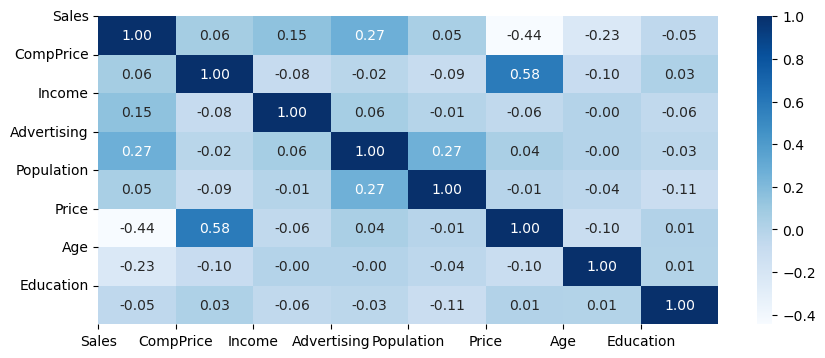

In [12]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(corr, cmap='Blues', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Data preprocessing

In [13]:
data = pd.get_dummies(data)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [14]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [15]:
data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [16]:
dataset = data.values

In [17]:
x = dataset[:, 1:]
y = dataset[:,0]

In [18]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [20]:
scores = fit.scores_
features = fit.transform(x)

In [21]:
scores

array([3.89832180e+00, 8.05201343e+01, 1.44508146e+02, 1.52363180e-01,
       2.49402227e+02, 6.64274764e+01, 1.30633499e+00, 4.16068376e+01,
       6.17243171e+01, 5.14133136e+00, 1.44231440e-01, 6.03521628e-02,
       5.19910473e+00, 2.86152276e+00])

In [22]:
col_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']

In [23]:
score_df = pd.DataFrame(list(zip(scores, col_names)),
               columns =['Score', 'Feature'])

In [24]:
score_df

,Score,Feature
0,3.898322,CompPrice
1,80.520134,Income
2,144.508146,Advertising
3,0.152363,Population
4,249.402227,Price
5,66.427476,Age
6,1.306335,Education
7,41.606838,ShelveLoc_Bad
8,61.724317,ShelveLoc_Good
9,5.141331,ShelveLoc_Medium


In [25]:
data_model = data[['Sales', 'Price', 'Advertising', 'Income', 'Age', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium']]
data_model.head()

,Sales,Price,Advertising,Income,Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,Medium,120,11,73,42,1,0,0
1,Medium,83,16,48,65,0,1,0
2,Medium,80,10,35,59,0,0,1
3,Medium,97,4,100,55,0,0,1
4,Low,128,3,64,38,1,0,0


In [26]:
x = data_model.iloc[:, 1:]
y = data['Sales']

# Test Train splitting

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 7)
(132, 7)
(268,)
(132,)


# Random Forest, Bagging and Boosting ensemble techniques

In [29]:
from sklearn.ensemble import  AdaBoostClassifier,BaggingClassifier,RandomForestClassifier

In [30]:
models=[RandomForestClassifier(n_estimators=200,max_samples=0.8),
        BaggingClassifier(n_estimators=200,max_samples=0.8),
       AdaBoostClassifier(n_estimators=200,random_state=42),
       ]

In [31]:
for model in models:
    model.fit (x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("===="*20)
    print(classification_report(y_test,pred))

RandomForestClassifier(max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

        High       1.00      0.08      0.14        13
         Low       0.70      0.60      0.65        35
      Medium       0.74      0.89      0.81        84

    accuracy                           0.73       132
   macro avg       0.81      0.52      0.53       132
weighted avg       0.76      0.73      0.70       132

BaggingClassifier(max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        13
         Low       0.63      0.54      0.58        35
      Medium       0.72      0.87      0.79        84

    accuracy                           0.70       132
   macro avg       0.45      0.47      0.46       132
weighted avg       0.63      0.70      0.66       132

AdaBoostClassifier(n_estimators=200, random_state=42)
              precision    recall  f1-score   support

        High      